###Name : Vedant Mehta
###Class : BE Comps
###UID : 2018130028
###Batch : B
###Experiment : 1

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as mp

In [4]:
data = pd.read_csv("horse.csv") 

In [5]:
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [7]:
is_null = pd.isnull(data).sum()
print(is_null)

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64


surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64


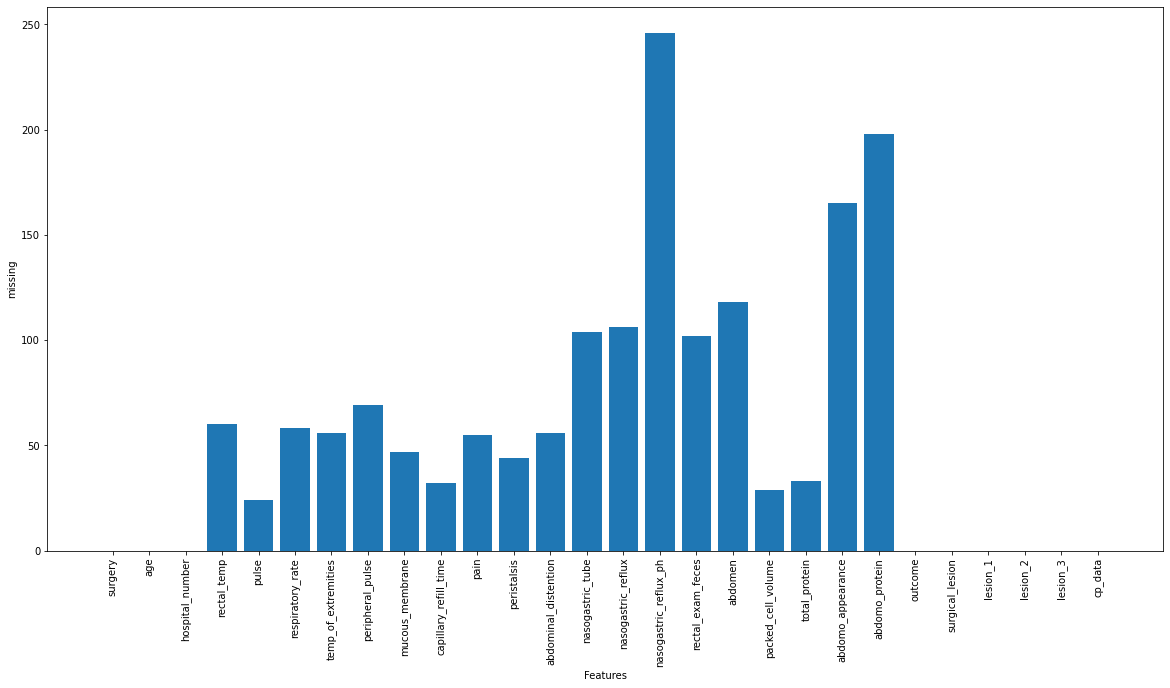

In [8]:
null = data.isnull().sum()

from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.bar(range(len(null)),null)
plt.xlabel('Features')
plt.ylabel('missing')
plt.xticks(list(range(len(data.columns))), list(data.columns.values), rotation='vertical')
plt.show

print(null)

In [9]:
data = data.drop(columns=['hospital_number', 'nasogastric_reflux_ph','abdomo_appearance','abdomo_protein'])

In [10]:
null = pd.concat([data.isnull().sum()], axis = 1, keys = ['NA'] )
null.loc[(null.NA>0)]

,NA
rectal_temp,60
pulse,24
respiratory_rate,58
temp_of_extremities,56
peripheral_pulse,69
mucous_membrane,47
capillary_refill_time,32
pain,55
peristalsis,44
abdominal_distention,56


299
52
                    rectal_temp     pulse  ...  lesion_2  lesion_3
rectal_temp            1.000000  0.325940  ... -0.013016       NaN
pulse                  0.325940  1.000000  ...  0.024787       NaN
respiratory_rate       0.346372  0.349160  ... -0.108626       NaN
packed_cell_volume     0.047700  0.560802  ...  0.007461       NaN
total_protein         -0.171927 -0.042858  ...  0.415973       NaN
lesion_1              -0.030141 -0.069206  ... -0.003456       NaN
lesion_2              -0.013016  0.024787  ...  1.000000       NaN
lesion_3                    NaN       NaN  ...       NaN       NaN

[8 rows x 8 columns]


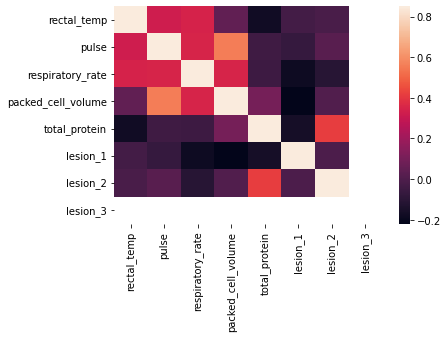

In [11]:
print(len(data))
data = data.dropna(how = 'any', axis = 'rows')
print(len(data))
print(data.corr())
#Heatmap of correlations
sns.heatmap(data.corr(), vmax=0.85)
mp.show()

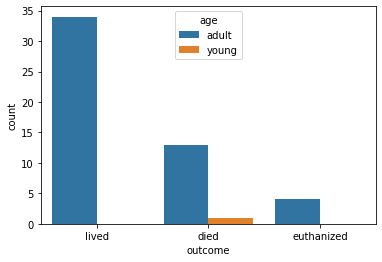

In [12]:
sns.countplot(data=data, x='outcome', hue = 'age')

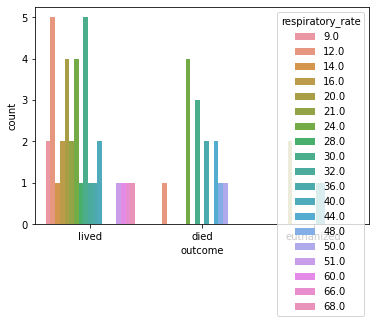

In [14]:
sns.countplot(data=data, x='outcome', hue = 'respiratory_rate')

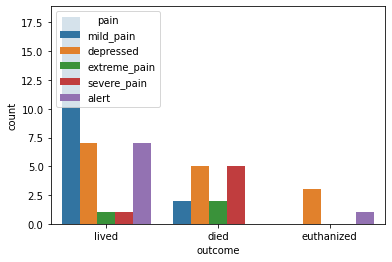

In [15]:
sns.countplot(data=data, x='outcome', hue = 'pain')

In [16]:
data2 = pd.get_dummies(data, columns =['surgery','age','capillary_refill_time','surgical_lesion','cp_data','abdominal_distention','temp_of_extremities','peripheral_pulse','mucous_membrane','pain','peristalsis','nasogastric_reflux','nasogastric_tube','rectal_exam_feces','abdomen'])
data2 = data2.replace({'outcome': {'lived': 1, 'died': 0, 'euthanized': np.nan}})
data2 = data2.dropna(how = 'any', axis = 'rows')

In [17]:
Selected_features = ['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein','surgery_no', 'surgery_yes', 'age_adult','age_young','abdominal_distention_moderate','abdominal_distention_none','abdominal_distention_severe','abdominal_distention_slight','peripheral_pulse_increased','peripheral_pulse_normal','peripheral_pulse_reduced']
#Calculation parameters
x = data2[Selected_features]
print(x.shape)
#Result for the calculation
y = data2['outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_test.shape)
print(x_train.shape)



(48, 16)
(10, 16)
(38, 16)


In [18]:
x_train.head()

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,surgery_no,surgery_yes,age_adult,age_young,abdominal_distention_moderate,abdominal_distention_none,abdominal_distention_severe,abdominal_distention_slight,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced
67,38.4,54.0,24.0,49.0,7.2,1,0,1,0,0,1,0,0,0,1,0
202,37.2,36.0,9.0,35.0,5.7,1,0,1,0,0,1,0,0,0,1,0
210,38.0,86.0,24.0,45.0,5.5,0,1,1,0,0,0,1,0,0,0,1
179,38.4,84.0,30.0,47.0,7.5,0,1,1,0,1,0,0,0,0,1,0
297,36.5,100.0,24.0,50.0,6.0,0,1,1,0,1,0,0,0,0,0,1


In [19]:
x_test.head()

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,surgery_no,surgery_yes,age_adult,age_young,abdominal_distention_moderate,abdominal_distention_none,abdominal_distention_severe,abdominal_distention_slight,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced
186,38.4,80.0,30.0,32.0,6.1,0,1,1,0,1,0,0,0,0,0,1
20,39.9,72.0,60.0,46.0,6.1,0,1,1,0,0,0,1,0,0,1,0
175,38.2,60.0,30.0,48.0,66.0,0,1,1,0,0,1,0,0,0,1,0
188,38.3,60.0,16.0,30.0,6.0,0,1,1,0,0,1,0,0,0,1,0
205,38.5,96.0,30.0,50.0,65.0,0,1,1,0,1,0,0,0,0,0,1


In [20]:
from sklearn import metrics
model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=10000)
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
log_regr_score = model.score(x_test, y_test)
print('score: ',log_regr_score)
# cm = metrics.confusion_matrix(y_pred, y_test)
# sns.set(font_scale=1.3)
# sns.heatmap(cm, annot=True)
# plt.show()

score:  0.7


**Conclusion**

1. I learned how one can deal with raw data and how to preprocess the data and structure it.
2. Able to visualize the data in proper EDA format and was able to apply logistic regression to the structure data